# Ensemble Techniques (Random Forest)

## 1. Bagging technique: Creating multiple models with different structures randomly to generate output 

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

## Read dataset 

In [2]:
import pandas as pd
df = pd.read_csv("train_titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Basic data quality checks 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
df.duplicated().sum()

0

## Seperate X and Y (Survived)

In [6]:
X = df.drop(columns=['PassengerId', 'Cabin', 'Name', 'Ticket', 'Survived'])
Y = df[['Survived']]

In [7]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [8]:
Y.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [9]:
Y.value_counts()

Survived
0           549
1           342
Name: count, dtype: int64

<Axes: xlabel='Survived'>

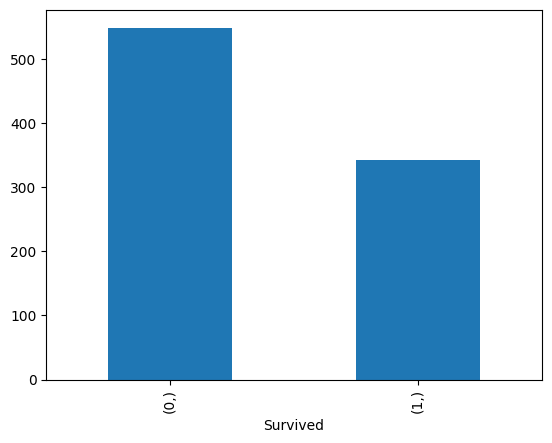

In [10]:
Y.value_counts().plot(kind='bar')

## Perform preprocessing on X 

In [11]:
cat = list(X.columns[X.dtypes=='object'])
con = list(X.columns[X.dtypes!='object'])

In [12]:
cat

['Sex', 'Embarked']

In [13]:
con

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [15]:
num_pipe = Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                           ('scaler', StandardScaler())])

In [16]:
cat_pipe = Pipeline(steps=[('impute', SimpleImputer(strategy='most_frequent')),
                          ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

In [17]:
pre = ColumnTransformer([('num', num_pipe, con),
                         ('cat', cat_pipe, cat)]).set_output(transform='pandas')

In [18]:
X_pre = pre.fit_transform(X)

In [19]:
X_pre.head()

,num__Pclass,num__Age,num__SibSp,num__Parch,num__Fare,cat__Sex_female,cat__Sex_male,cat__Embarked_C,cat__Embarked_Q,cat__Embarked_S
0,0.827377,-0.565736,0.432793,-0.473674,-0.502445,0.0,1.0,0.0,0.0,1.0
1,-1.566107,0.663861,0.432793,-0.473674,0.786845,1.0,0.0,1.0,0.0,0.0
2,0.827377,-0.258337,-0.474545,-0.473674,-0.488854,1.0,0.0,0.0,0.0,1.0
3,-1.566107,0.433312,0.432793,-0.473674,0.420730,1.0,0.0,0.0,0.0,1.0
4,0.827377,0.433312,-0.474545,-0.473674,-0.486337,0.0,1.0,0.0,0.0,1.0


## Apply train test split 

In [20]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_pre, Y, test_size=0.2, random_state=21)

In [21]:
xtrain.head()

,num__Pclass,num__Age,num__SibSp,num__Parch,num__Fare,cat__Sex_female,cat__Sex_male,cat__Embarked_C,cat__Embarked_Q,cat__Embarked_S
793,-1.566107,-0.104637,-0.474545,-0.473674,-0.030371,0.0,1.0,1.0,0.0,0.0
23,-1.566107,-0.104637,-0.474545,-0.473674,0.066360,0.0,1.0,0.0,0.0,1.0
97,-1.566107,-0.488887,-0.474545,0.767630,0.627278,0.0,1.0,1.0,0.0,0.0
9,-0.369365,-1.180535,0.432793,-0.473674,-0.042956,1.0,0.0,1.0,0.0,0.0
157,0.827377,0.049062,-0.474545,-0.473674,-0.486337,0.0,1.0,0.0,0.0,1.0


In [22]:
xtest.head()

,num__Pclass,num__Age,num__SibSp,num__Parch,num__Fare,cat__Sex_female,cat__Sex_male,cat__Embarked_C,cat__Embarked_Q,cat__Embarked_S
617,0.827377,-0.258337,0.432793,-0.473674,-0.324253,1.0,0.0,0.0,0.0,1.0
379,0.827377,-0.796286,-0.474545,-0.473674,-0.491874,0.0,1.0,0.0,0.0,1.0
725,0.827377,-0.719436,-0.474545,-0.473674,-0.474005,0.0,1.0,0.0,0.0,1.0
826,0.827377,-0.104637,-0.474545,-0.473674,0.489104,0.0,1.0,0.0,0.0,1.0
450,-0.369365,0.510161,0.432793,2.008933,-0.089684,0.0,1.0,0.0,0.0,1.0


In [23]:
ytrain.head()

,Survived
793,0
23,1
97,1
9,1
157,0


In [24]:
ytest.head()

,Survived
617,0
379,0
725,0
826,0
450,0


## Build the model 

In [25]:
from sklearn.ensemble import RandomForestClassifier
model1 = RandomForestClassifier(n_estimators=1, max_depth=1, criterion='gini', min_samples_split=5,min_samples_leaf=5)
model1.fit(xtrain, ytrain)

RandomForestClassifier(max_depth=1, min_samples_leaf=5, min_samples_split=5,
                       n_estimators=1)

In [26]:
model1.score(xtrain, ytrain)

0.6882022471910112

In [27]:
model1.score(xtest, ytest)

0.659217877094972

## Tune the model with Hyperparameter tuning 

In [28]:
params1 = {'n_estimators':[10,50,100,200],
          'max_depth':[1,2,3,4,5,6,7],
          'min_samples_split':[5,6,7,8,9,10]}

In [29]:
from sklearn.model_selection import RandomizedSearchCV
rfc = RandomForestClassifier()
rscv1 = RandomizedSearchCV(rfc, param_distributions=params1, cv=5, scoring='f1_macro')
rscv1.fit(xtrain, ytrain)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [1, 2, 3, 4, 5, 6, 7],
                                        'min_samples_split': [5, 6, 7, 8, 9,
                                                              10],
                                        'n_estimators': [10, 50, 100, 200]},
                   scoring='f1_macro')

In [30]:
rscv1.best_params_

{'n_estimators': 200, 'min_samples_split': 5, 'max_depth': 7}

In [31]:
rscv1.best_score_

0.8070787324893921

In [32]:
best_rfc = rscv1.best_estimator_
best_rfc

RandomForestClassifier(max_depth=7, min_samples_split=5, n_estimators=200)

## Evaluate random forest 

In [33]:
best_rfc.score(xtrain, ytrain)

0.8904494382022472

In [34]:
best_rfc.score(xtest, ytest)

0.8044692737430168

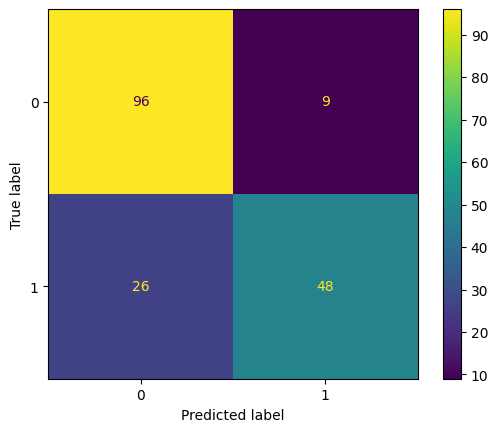

In [35]:
#Confusion matrix 
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(best_rfc, xtest, ytest)

In [36]:
#Predict the results for train and test
ypred_train = best_rfc.predict(xtrain)
ypred_test = best_rfc.predict(xtest)

In [37]:
ypred_train[0:5]

array([0, 0, 0, 1, 0], dtype=int64)

In [38]:
ytrain.head()

,Survived
793,0
23,1
97,1
9,1
157,0


In [39]:
ypred_test[0:5]

array([1, 0, 0, 1, 0], dtype=int64)

In [40]:
ytest.head()

,Survived
617,0
379,0
725,0
826,0
450,0


In [41]:
#Print the classification report
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred_test))

              precision    recall  f1-score   support

           0       0.79      0.91      0.85       105
           1       0.84      0.65      0.73        74

    accuracy                           0.80       179
   macro avg       0.81      0.78      0.79       179
weighted avg       0.81      0.80      0.80       179



### Gradient boosting model 

In [42]:
from sklearn.ensemble import GradientBoostingClassifier
model2 = GradientBoostingClassifier(n_estimators=1, learning_rate=0.5,
                                    max_depth=1,
                                    min_samples_split=5,min_samples_leaf=5)
model2.fit(xtrain,ytrain)

GradientBoostingClassifier(learning_rate=0.5, max_depth=1, min_samples_leaf=5,
                           min_samples_split=5, n_estimators=1)

In [43]:
model2.score(xtrain, ytrain)

0.7879213483146067

In [44]:
model2.score(xtest,ytest)

0.7821229050279329

### Hyperparameter tuning 

In [48]:
params2 = {'n_estimators':[10,50,100,200,300],
           'learning_rate':[0.01,0.05,0.1,0.2],
           'max_depth':[2,3,4,5,6,7]}

In [49]:
gbc = GradientBoostingClassifier()
rscv2 = RandomizedSearchCV(gbc, param_distributions=params2, cv=5, scoring='f1_macro')
rscv2.fit(xtrain,ytrain)

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(),
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1, 0.2],
                                        'max_depth': [2, 3, 4, 5, 6, 7],
                                        'n_estimators': [10, 50, 100, 200,
                                                         300]},
                   scoring='f1_macro')

In [51]:
rscv2.best_params_

{'n_estimators': 200, 'max_depth': 2, 'learning_rate': 0.2}

In [52]:
rscv2.best_score_

0.8067275857772171

In [53]:
best_gbc = rscv2.best_estimator_
best_gbc

GradientBoostingClassifier(learning_rate=0.2, max_depth=2, n_estimators=200)

In [54]:
best_gbc.score(xtrain,ytrain)

0.9199438202247191

In [55]:
best_gbc.score(xtest,ytest)

0.8212290502793296

### Evaluate the model 

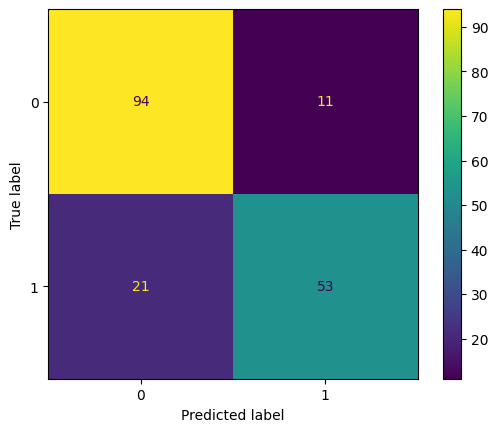

In [56]:
ConfusionMatrixDisplay.from_estimator(best_gbc,xtest,ytest)

In [57]:
ypred_train2 = best_gbc.predict(xtrain)
ypred_test2 = best_gbc.predict(xtest)

In [58]:
ypred_test2[0:5]

array([1, 0, 0, 1, 0], dtype=int64)

In [59]:
ytest.head()

,Survived
617,0
379,0
725,0
826,0
450,0


In [60]:
print(classification_report(ytest, ypred_test2))

              precision    recall  f1-score   support

           0       0.82      0.90      0.85       105
           1       0.83      0.72      0.77        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



### Gradient boosting model is slightly better than Random forest in this case as its score is more than 80% 

## Choosing Gradient model for out of sample prediction 

In [61]:
# Plot the important features 
best_gbc.feature_importances_

array([0.12381609, 0.15615744, 0.03235043, 0.01978753, 0.18957144,
       0.08527882, 0.36574225, 0.00279254, 0.00770164, 0.01680182])

In [62]:
xtrain.columns

Index(['num__Pclass', 'num__Age', 'num__SibSp', 'num__Parch', 'num__Fare',
       'cat__Sex_female', 'cat__Sex_male', 'cat__Embarked_C',
       'cat__Embarked_Q', 'cat__Embarked_S'],
      dtype='object')

In [63]:
imp = pd.Series(best_gbc.feature_importances_, index=xtrain.columns)

In [64]:
imp

num__Pclass        0.123816
num__Age           0.156157
num__SibSp         0.032350
num__Parch         0.019788
num__Fare          0.189571
cat__Sex_female    0.085279
cat__Sex_male      0.365742
cat__Embarked_C    0.002793
cat__Embarked_Q    0.007702
cat__Embarked_S    0.016802
dtype: float64

In [65]:
imp.sort_values(ascending=False)

cat__Sex_male      0.365742
num__Fare          0.189571
num__Age           0.156157
num__Pclass        0.123816
cat__Sex_female    0.085279
num__SibSp         0.032350
num__Parch         0.019788
cat__Embarked_S    0.016802
cat__Embarked_Q    0.007702
cat__Embarked_C    0.002793
dtype: float64

<Axes: >

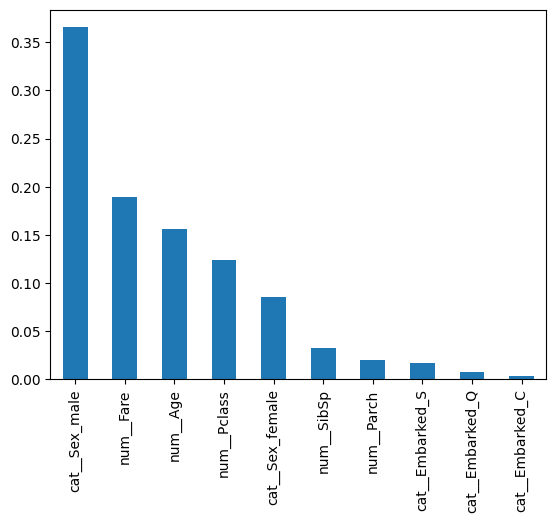

In [66]:
imp.sort_values(ascending=False).plot(kind='bar')